Ratings overall per company

In [84]:
import requests
from bs4 import BeautifulSoup
import sys
from os import path
import csv
import pandas as pd
from sklearn.pipeline import make_pipeline
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
import string
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import seaborn as sns
import re
import matplotlib.pyplot as plt

In [67]:
reviews_df = pd.read_csv('reviews.csv', sep=',', encoding='cp1252')
reviews_df.head()

,company,title,author_info,rating,pros,cons,helpful
0,Meta,good good good good good,"Jun 5, 2023 - Sr Data Scientist",5,good good good good good,"too busy, on boarding process too bad",Be the first to find this review helpful
1,Meta,"terrible management, boring work, no culture","Jun 5, 2023 - Data Scientist",2,the compensation among the highest in the indu...,"Zuck has no idea what he's doing, managers pla...",1 person found this review helpful
2,Meta,Data Scientist @ Meta,"Jun 6, 2023 - Data Scientist",4,"I loved working at Meta. Tons of autonomy, and...",Too much job insecurity and wavering prioritie...,Be the first to find this review helpful
3,Meta,3 years as DS before getting laid off,"May 20, 2023 - Senior Data Scientist",4,promote was encouraged if you have the impact ...,super pushy once you become more senior. there...,1 person found this review helpful
4,Meta,Nice place to work,"Jun 1, 2023 - Data Scientist",4,Great opportunities for career growth.,Fierce competition to get in and stay relevant,Be the first to find this review helpful


Put years into its own column, and put unique values into list

In [68]:
reviews_df['year'] = reviews_df.author_info.apply(lambda x: re.findall(r'\d{4}', x)).apply(lambda y: y[0]).astype(int)

In [78]:
reviews_df.head()

,company,title,author_info,rating,pros,cons,helpful,year
0,Meta,good good good good good,"Jun 5, 2023 - Sr Data Scientist",5,good good good good good,"too busy, on boarding process too bad",Be the first to find this review helpful,2023
1,Meta,"terrible management, boring work, no culture","Jun 5, 2023 - Data Scientist",2,the compensation among the highest in the indu...,"Zuck has no idea what he's doing, managers pla...",1 person found this review helpful,2023
2,Meta,Data Scientist @ Meta,"Jun 6, 2023 - Data Scientist",4,"I loved working at Meta. Tons of autonomy, and...",Too much job insecurity and wavering prioritie...,Be the first to find this review helpful,2023
3,Meta,3 years as DS before getting laid off,"May 20, 2023 - Senior Data Scientist",4,promote was encouraged if you have the impact ...,super pushy once you become more senior. there...,1 person found this review helpful,2023
4,Meta,Nice place to work,"Jun 1, 2023 - Data Scientist",4,Great opportunities for career growth.,Fierce competition to get in and stay relevant,Be the first to find this review helpful,2023


Create unique dataframe for each company

In [70]:
meta_df = reviews_df[(reviews_df['company'] == 'Meta')]
apple_df = reviews_df[(reviews_df['company'] == 'Apple')]
microsoft_df = reviews_df[(reviews_df['company'] == 'Microsoft')]
google_df = reviews_df[(reviews_df['company'] == 'Google')]
amazon_df = reviews_df[(reviews_df['company'] == 'Amazon')]

Create lineplots for ratings per year per company individually

In [153]:
company_list = [meta_df, apple_df, microsoft_df, google_df, amazon_df]
company_names = ['Meta', 'Apple', 'Microsoft', 'Google', 'Amazon']

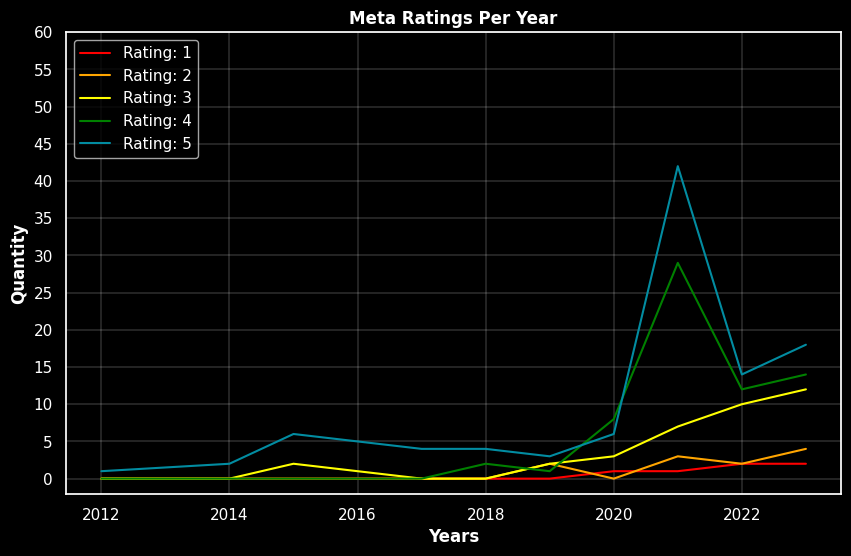

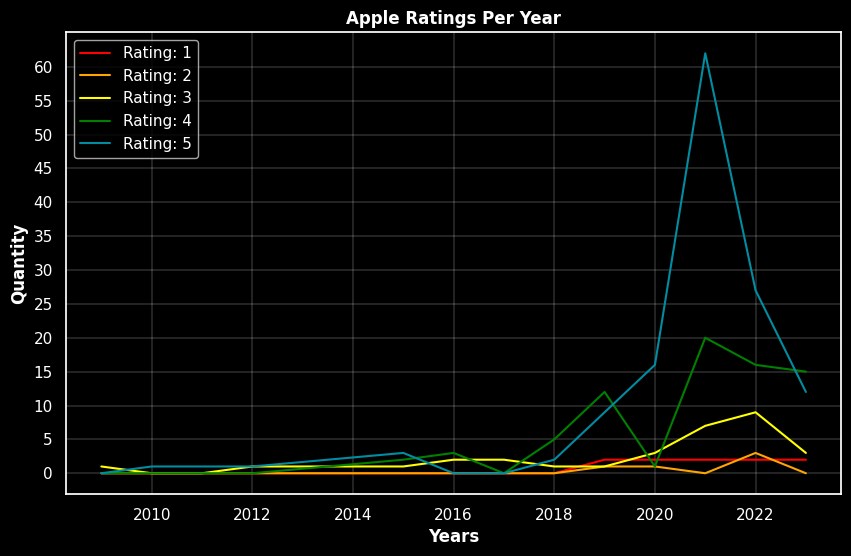

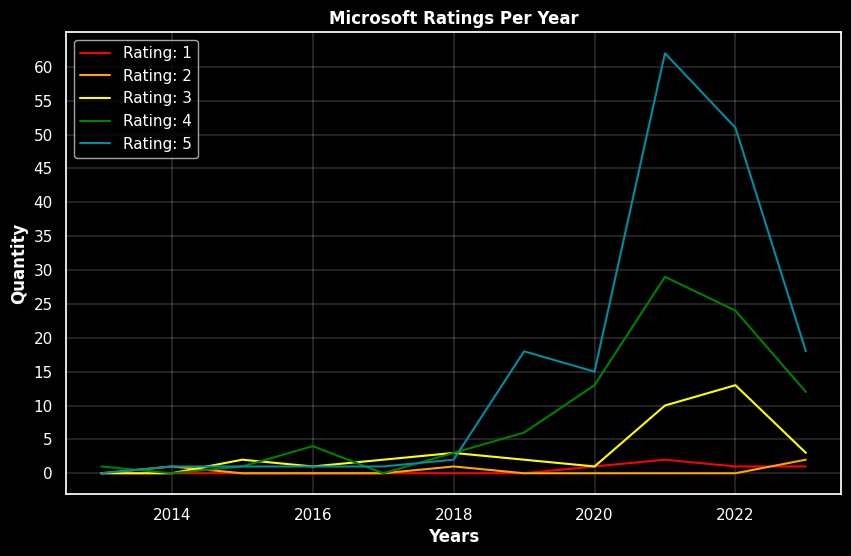

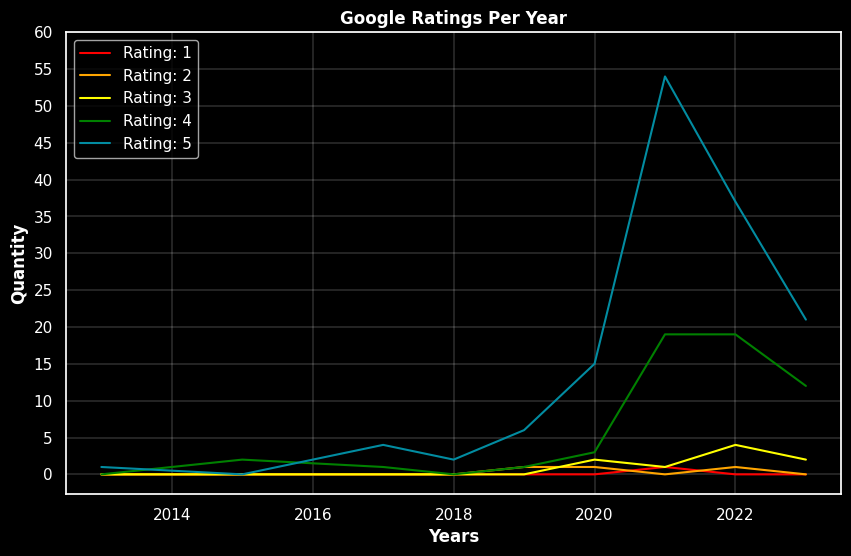

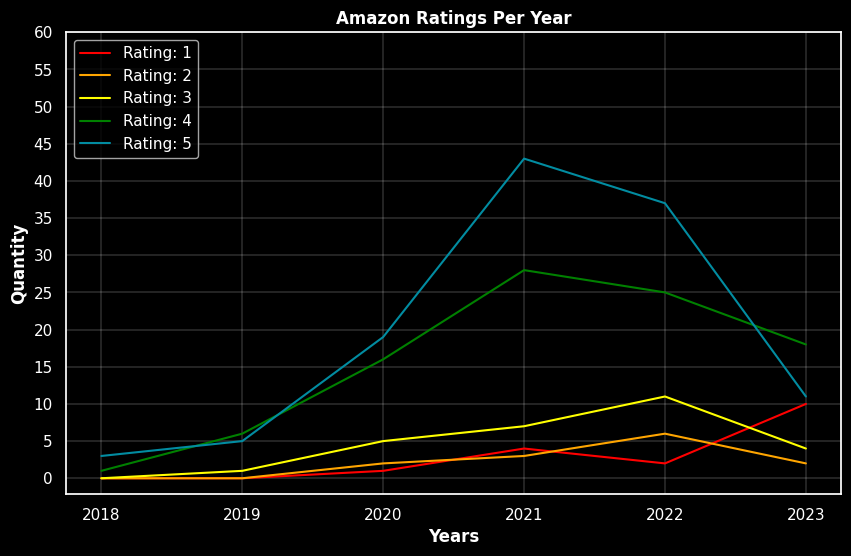

In [291]:
i = 1
for company, name in zip(company_list, company_names):
    x = company.groupby(['year', 'rating']).size().unstack(fill_value=0).index.tolist()
    y = company.groupby(['year', 'rating']).size().unstack(fill_value=0)
    y5 = y[5].to_list()
    y4 = y[4].to_list()
    y3 = y[3].to_list()
    y2 = y[2].to_list()
    y1 = y[1].to_list()
    plt.style.use('dark_background')
    sns.set_style()
    plt.figure(figsize=(10,6))
    sns.lineplot(x=x, y=y1, color='red', label='Rating: 1');
    sns.lineplot(x=x, y=y2, color='orange', label='Rating: 2');
    sns.lineplot(x=x, y=y3, color='yellow', label='Rating: 3');
    sns.lineplot(x=x, y=y4, color='green', label='Rating: 4');
    sns.lineplot(x=x, y=y5, color='#028ca1', label='Rating: 5');
    plt.xlabel('Years', weight='bold')
    plt.ylabel('Quantity', weight='bold')
    plt.grid(linewidth=0.2)
    plt.legend(loc='upper left')
    plt.yticks([0,5,10,15,20,25,30,35,40,45,50,55,60])
    plt.title(f'{name} Ratings Per Year', weight='bold')
    plt.show()
    i += 1

Create lineplots for average ratings per year per company together

In [242]:
reviews_sorted_df = reviews_df.groupby(['company', 'year', 'rating']).size().unstack(fill_value=0)
reviews_sorted_df['mean'] = reviews_sorted_df.mean(axis=1)
reviews_sorted_df = reviews_sorted_df.reset_index()
reviews_sorted_df

rating,company,year,1,2,3,4,5,mean
0,Amazon,2018,0,0,0,1,3,0.8
1,Amazon,2019,0,0,1,6,5,2.4
2,Amazon,2020,1,2,5,16,19,8.6
3,Amazon,2021,4,3,7,28,43,17.0
4,Amazon,2022,2,6,11,25,37,16.2
5,Amazon,2023,10,2,4,18,11,9.0
6,Apple,2009,0,0,1,0,0,0.2
7,Apple,2010,0,0,0,0,1,0.2
8,Apple,2011,0,0,0,0,1,0.2
9,Apple,2012,0,0,1,0,1,0.4


Text(0.5, 1.0, 'Company Average Ratings')

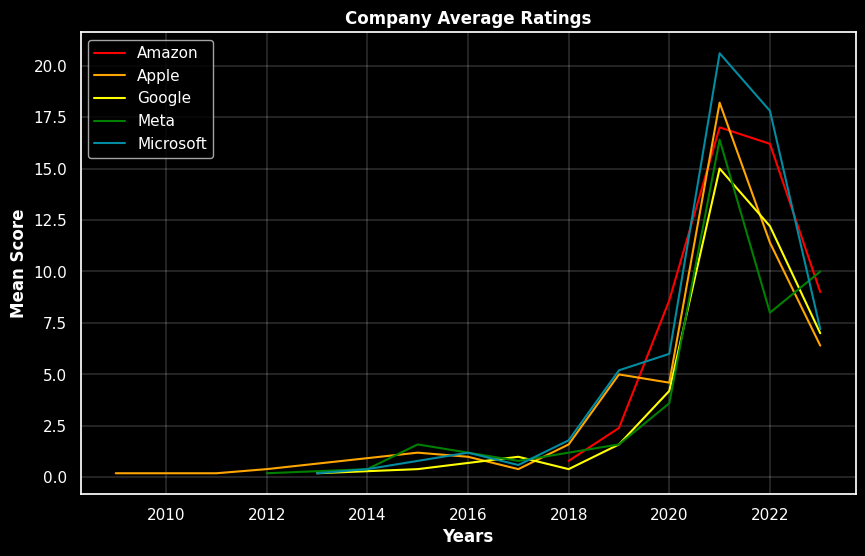

In [247]:
plt.style.use('dark_background')
sns.set_style()
plt.figure(figsize=(10,6))
sns.lineplot(x='year', y='mean', hue='company', data=reviews_sorted_df, palette=['red', 'orange', 'yellow', 'green', '#028ca1']);
plt.xlabel('Years', weight='bold')
plt.ylabel('Mean Score', weight='bold')
plt.grid(linewidth=0.2)
plt.legend(loc='upper left')
plt.title('Company Average Ratings', weight='bold')

Overall company ratings barplots

In [284]:
company_ratings_df = reviews_df.groupby(['company', 'rating']).size().unstack(fill_value=0).reset_index()
company_ratings_df

rating,company,1,2,3,4,5
0,Amazon,17,13,28,94,118
1,Apple,10,5,31,74,134
2,Google,1,3,9,57,140
3,Meta,6,11,36,66,100
4,Microsoft,5,4,37,93,170


In [286]:
company_ratings_df_melt = pd.melt(company_ratings_df, id_vars='company', var_name='rating', value_name='rating_value')
company_ratings_df_melt

,company,rating,rating_value
0,Amazon,1,17
1,Apple,1,10
2,Google,1,1
3,Meta,1,6
4,Microsoft,1,5
5,Amazon,2,13
6,Apple,2,5
7,Google,2,3
8,Meta,2,11
9,Microsoft,2,4


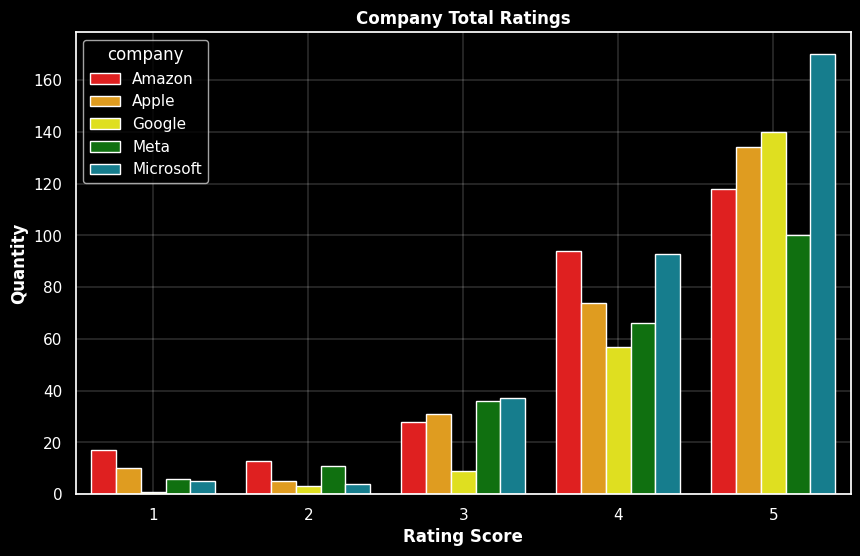

In [293]:
plt.style.use('dark_background')
sns.set_style()
plt.figure(figsize=(10,6))
sns.barplot(x='rating', y='rating_value', hue='company', data=company_ratings_df_melt, palette=['red', 'orange', 'yellow', 'green', '#028ca1']);
plt.xlabel('Rating Score', weight='bold')
plt.ylabel('Quantity', weight='bold')
plt.title('Company Total Ratings', weight='bold');
plt.grid(linewidth=0.2)

Individual company ratings barplots

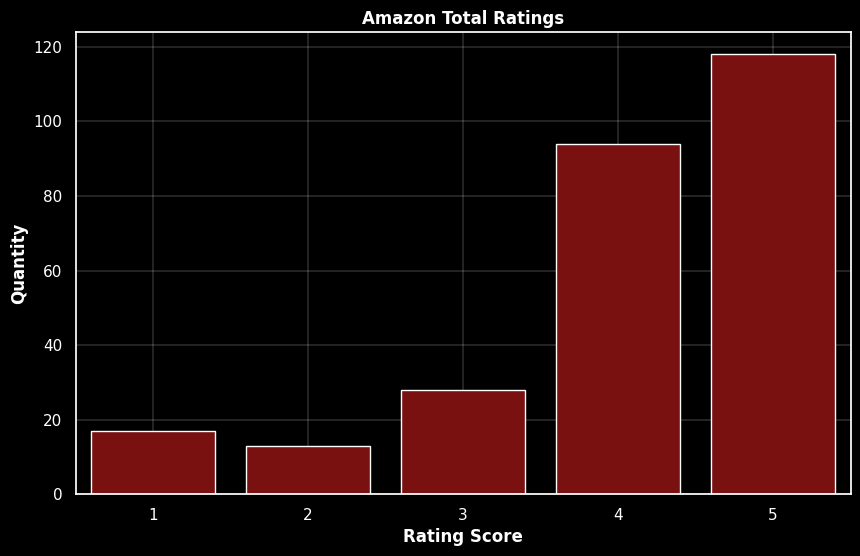

In [312]:
amazon_company_ratings_df_melt = company_ratings_df_melt[(company_ratings_df_melt['company'] == 'Amazon')]
plt.style.use('dark_background')
sns.set_style()
plt.figure(figsize=(10,6))
sns.barplot(x='rating', y='rating_value', data=amazon_company_ratings_df_melt, palette=['darkred'], errorbar=None);
plt.xlabel('Rating Score', weight='bold')
plt.ylabel('Quantity', weight='bold')
plt.title('Amazon Total Ratings', weight='bold');
plt.grid(linewidth=0.2)

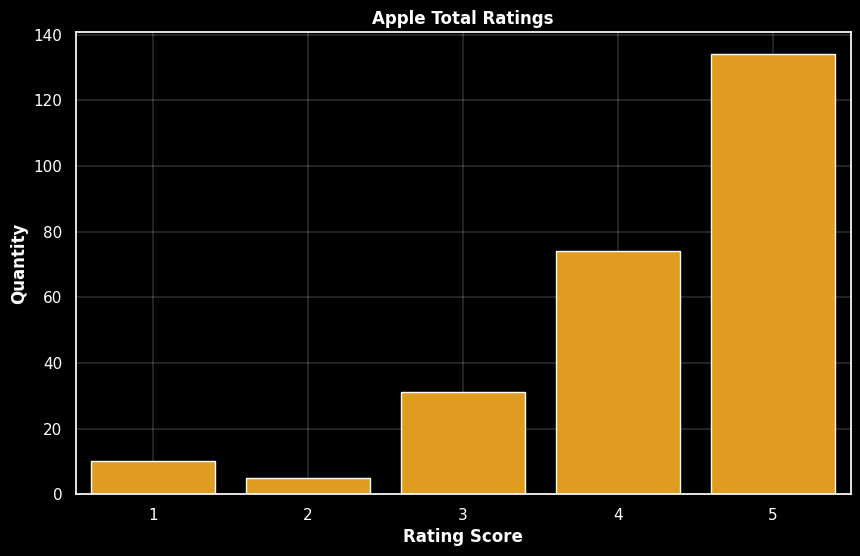

In [313]:
apple_company_ratings_df_melt = company_ratings_df_melt[(company_ratings_df_melt['company'] == 'Apple')]
plt.style.use('dark_background')
sns.set_style()
plt.figure(figsize=(10,6))
sns.barplot(x='rating', y='rating_value', data=apple_company_ratings_df_melt, palette=['orange'], errorbar=None);
plt.xlabel('Rating Score', weight='bold');
plt.ylabel('Quantity', weight='bold');
plt.title('Apple Total Ratings', weight='bold');
plt.grid(linewidth=0.2);

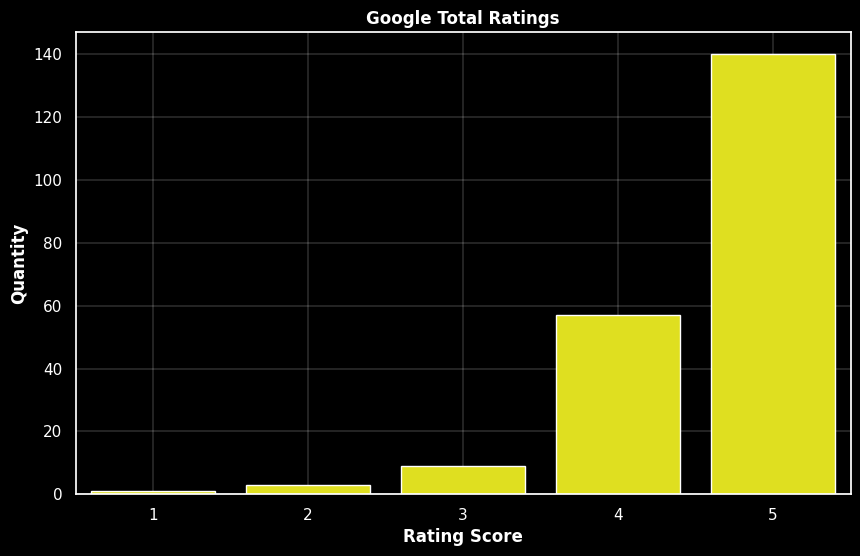

In [314]:
google_company_ratings_df_melt = company_ratings_df_melt[(company_ratings_df_melt['company'] == 'Google')]
plt.style.use('dark_background')
sns.set_style()
plt.figure(figsize=(10,6))
sns.barplot(x='rating', y='rating_value', data=google_company_ratings_df_melt, palette=['yellow'], errorbar=None);
plt.xlabel('Rating Score', weight='bold');
plt.ylabel('Quantity', weight='bold');
plt.title('Google Total Ratings', weight='bold');
plt.grid(linewidth=0.2);

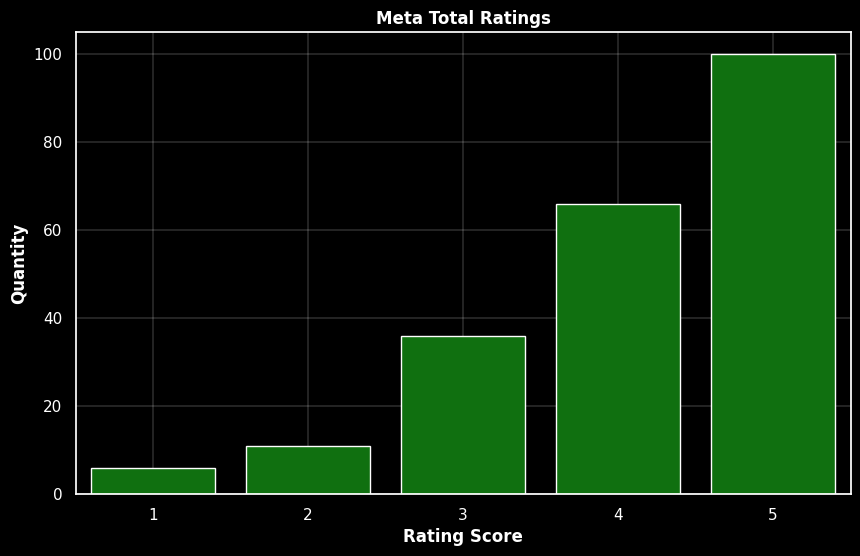

In [315]:
meta_company_ratings_df_melt = company_ratings_df_melt[(company_ratings_df_melt['company'] == 'Meta')]
plt.style.use('dark_background')
sns.set_style()
plt.figure(figsize=(10,6))
sns.barplot(x='rating', y='rating_value', data=meta_company_ratings_df_melt, palette=['green'], errorbar=None);
plt.xlabel('Rating Score', weight='bold');
plt.ylabel('Quantity', weight='bold');
plt.title('Meta Total Ratings', weight='bold');
plt.grid(linewidth=0.2);

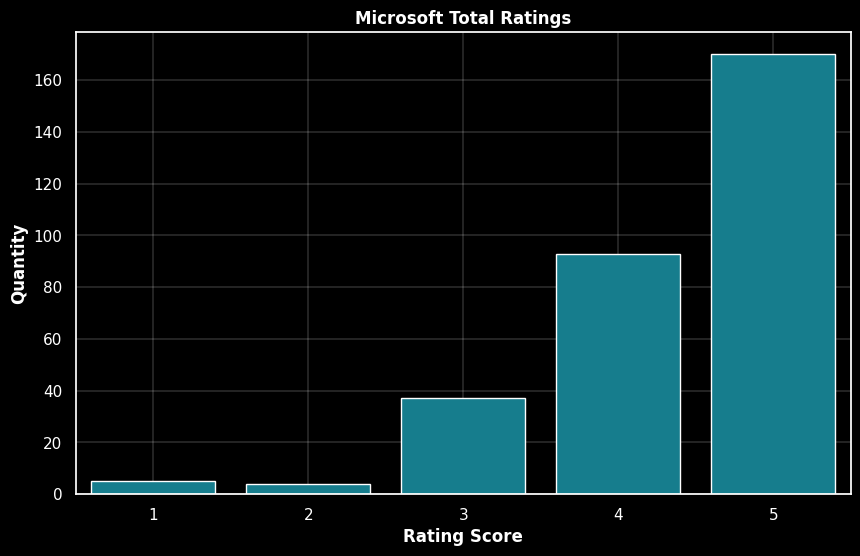

In [316]:
microsoft_company_ratings_df_melt = company_ratings_df_melt[(company_ratings_df_melt['company'] == 'Microsoft')]
plt.style.use('dark_background')
sns.set_style()
plt.figure(figsize=(10,6))
sns.barplot(x='rating', y='rating_value', data=microsoft_company_ratings_df_melt, palette=['#028ca1'], errorbar=None);
plt.xlabel('Rating Score', weight='bold');
plt.ylabel('Quantity', weight='bold');
plt.title('Microsoft Total Ratings', weight='bold');
plt.grid(linewidth=0.2);